# Paper ST-Sloping - 1000x Random Split Result Analysis

## Setup

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams['figure.facecolor'] = 'white'

## Load Results

In [2]:
random_split_4beat_df = pd.read_csv('result/multi_4beats_1000x_random_split.csv', index_col=0)
random_split_6beat_df = pd.read_csv('result/multi_6beats_1000x_random_split.csv', index_col=0)
random_split_8beat_df = pd.read_csv('result/multi_8beats_1000x_random_split.csv', index_col=0)
random_split_10beat_df = pd.read_csv('result/multi_10beats_1000x_random_split.csv', index_col=0)
random_split_16beat_df = pd.read_csv('result/multi_16beats_1000x_random_split.csv', index_col=0)
random_split_32beat_df = pd.read_csv('result/multi_32beats_1000x_random_split.csv', index_col=0)
random_split_64beat_df = pd.read_csv('result/multi_64beats_1000x_random_split.csv', index_col=0)

In [3]:
sec_array = ["4beats", "6beats", "8beats", "10beats", "16beats", "32beats", "64beats"]
random_split_array = [
    random_split_4beat_df,
    random_split_6beat_df, random_split_8beat_df,
    random_split_10beat_df, random_split_16beat_df,
    random_split_32beat_df, random_split_64beat_df
]

## Preview

In [4]:
random_split_10beat_df.head(3)

,accuracy,precision,recall,specificity,f1,nsr_accuracy,nsr_precision,nsr_recall,nsr_specificity,nsr_f1,st+_accuracy,st+_precision,st+_recall,st+_specificity,st+_f1,st-_accuracy,st-_precision,st-_recall,st-_specificity,st-_f1
0,0.921185,0.921841,0.921185,0.786364,0.917005,0.921276,0.919179,0.983213,0.722372,0.950119,0.982628,0.926075,0.836165,0.994561,0.878827,0.982628,0.932390,0.668923,0.990615,0.778982
1,0.920179,0.921290,0.920179,0.778068,0.915757,0.920545,0.917688,0.984466,0.712227,0.949905,0.980799,0.913842,0.812814,0.993985,0.860372,0.980799,0.941647,0.664786,0.992035,0.779358
2,0.925482,0.925647,0.925482,0.795437,0.921949,0.925665,0.926245,0.981732,0.737136,0.953182,0.982171,0.903401,0.842640,0.993004,0.871963,0.982171,0.932912,0.687609,0.990779,0.791695


## Processing

In [5]:
# Total
df_accuracy = pd.DataFrame()
for df, sec in zip(random_split_array, sec_array):
    df_accuracy[sec] =          df['accuracy']

df_specificity = pd.DataFrame()
for df, sec in zip(random_split_array, sec_array):
    df_specificity[sec] =       df['specificity']

df_precision = pd.DataFrame()
for df, sec in zip(random_split_array, sec_array):
    df_precision[sec] =         df['precision']

df_recall = pd.DataFrame()
for df, sec in zip(random_split_array, sec_array):
    df_recall[sec] =            df['recall']

df_f1 = pd.DataFrame()
for df, sec in zip(random_split_array, sec_array):
    df_f1[sec] =                df['f1']

# NSR
df_nsr_accuracy = pd.DataFrame()
for df, sec in zip(random_split_array, sec_array):
    df_nsr_accuracy[sec] =          df['nsr_accuracy']

df_nsr_specificity = pd.DataFrame()
for df, sec in zip(random_split_array, sec_array):
    df_nsr_specificity[sec] =       df['nsr_specificity']

df_nsr_precision = pd.DataFrame()
for df, sec in zip(random_split_array, sec_array):
    df_nsr_precision[sec] =         df['nsr_precision']

df_nsr_recall = pd.DataFrame()
for df, sec in zip(random_split_array, sec_array):
    df_nsr_recall[sec] =            df['nsr_recall']

df_nsr_f1 = pd.DataFrame()
for df, sec in zip(random_split_array, sec_array):
    df_nsr_f1[sec] =                df['nsr_f1']

# ST+
df_st1_accuracy = pd.DataFrame()
for df, sec in zip(random_split_array, sec_array):
    df_st1_accuracy[sec] =          df['st+_accuracy']

df_st1_specificity = pd.DataFrame()
for df, sec in zip(random_split_array, sec_array):
    df_st1_specificity[sec] =       df['st+_specificity']

df_st1_precision = pd.DataFrame()
for df, sec in zip(random_split_array, sec_array):
    df_st1_precision[sec] =         df['st+_precision']

df_st1_recall = pd.DataFrame()
for df, sec in zip(random_split_array, sec_array):
    df_st1_recall[sec] =            df['st+_recall']

df_st1_f1 = pd.DataFrame()
for df, sec in zip(random_split_array, sec_array):
    df_st1_f1[sec] =                df['st+_f1']

# ST-
df_st0_accuracy = pd.DataFrame()
for df, sec in zip(random_split_array, sec_array):
    df_st0_accuracy[sec] =          df['st-_accuracy']

df_st0_specificity = pd.DataFrame()
for df, sec in zip(random_split_array, sec_array):
    df_st0_specificity[sec] =       df['st-_specificity']

df_st0_precision = pd.DataFrame()
for df, sec in zip(random_split_array, sec_array):
    df_st0_precision[sec] =         df['st-_precision']

df_st0_recall = pd.DataFrame()
for df, sec in zip(random_split_array, sec_array):
    df_st0_recall[sec] =            df['st-_recall']

df_st0_f1 = pd.DataFrame()
for df, sec in zip(random_split_array, sec_array):
    df_st0_f1[sec] =                df['st-_f1']


metrics = pd.DataFrame()
for df, sec in zip(random_split_array, sec_array):
    row = dict()
    row['aaa_name'] = sec
    row['acc_avg'] =                 df["accuracy"].mean()
    row['acc_sd'] =                  df["accuracy"].std()
    row['specificity_avg'] =         df["specificity"].mean()
    row['specificity_sd'] =          df["specificity"].std()
    row['precision_avg'] =           df["precision"].mean()
    row['precision_sd'] =            df["precision"].std()
    row['recall_avg'] =              df["recall"].mean()
    row['recall_sd'] =               df["recall"].std()
    row['f1_avg'] =                  df["f1"].mean()
    row['f1_sd'] =                   df["f1"].std()

    row['nsr_accuracy_avg'] =        df["nsr_accuracy"].mean()
    row['nsr_accuracy_sd'] =         df["nsr_accuracy"].std()
    row['nsr_specificity_avg'] =     df["nsr_specificity"].mean()
    row['nsr_specificity_sd'] =      df["nsr_specificity"].std()
    row['nsr_precision_avg'] =       df["nsr_precision"].mean()
    row['nsr_precision_sd'] =        df["nsr_precision"].std()
    row['nsr_recall_avg'] =          df["nsr_recall"].mean()
    row['nsr_recall_sd'] =           df["nsr_recall"].std()
    row['nsr_f1_avg'] =              df["nsr_f1"].mean()
    row['nsr_f1_sd'] =               df["nsr_f1"].std()

    row['st+_accuracy_avg'] =        df["st+_accuracy"].mean()
    row['st+_accuracy_sd'] =         df["st+_accuracy"].std()
    row['st+_specificity_avg'] =     df["st+_specificity"].mean()
    row['st+_specificity_sd'] =      df["st+_specificity"].std()
    row['st+_precision_avg'] =       df["st+_precision"].mean()
    row['st+_precision_sd'] =        df["st+_precision"].std()
    row['st+_recall_avg'] =          df["st+_recall"].mean()
    row['st+_recall_sd'] =           df["st+_recall"].std()
    row['st+_f1_avg'] =              df["st+_f1"].mean()
    row['st+_f1_sd'] =               df["st+_f1"].std()

    row['st-_accuracy_avg'] =        df["st-_accuracy"].mean()
    row['st-_accuracy_sd'] =         df["st-_accuracy"].std()
    row['st-_specificity_avg'] =     df["st-_specificity"].mean()
    row['st-_specificity_sd'] =      df["st-_specificity"].std()
    row['st-_precision_avg'] =       df["st-_precision"].mean()
    row['st-_precision_sd'] =        df["st-_precision"].std()
    row['st-_recall_avg'] =          df["st-_recall"].mean()
    row['st-_recall_sd'] =           df["st-_recall"].std()
    row['st-_f1_avg'] =              df["st-_f1"].mean()
    row['st-_f1_sd'] =               df["st-_f1"].std()
    metrics = metrics.append(row, ignore_index=True)

## Box plot table

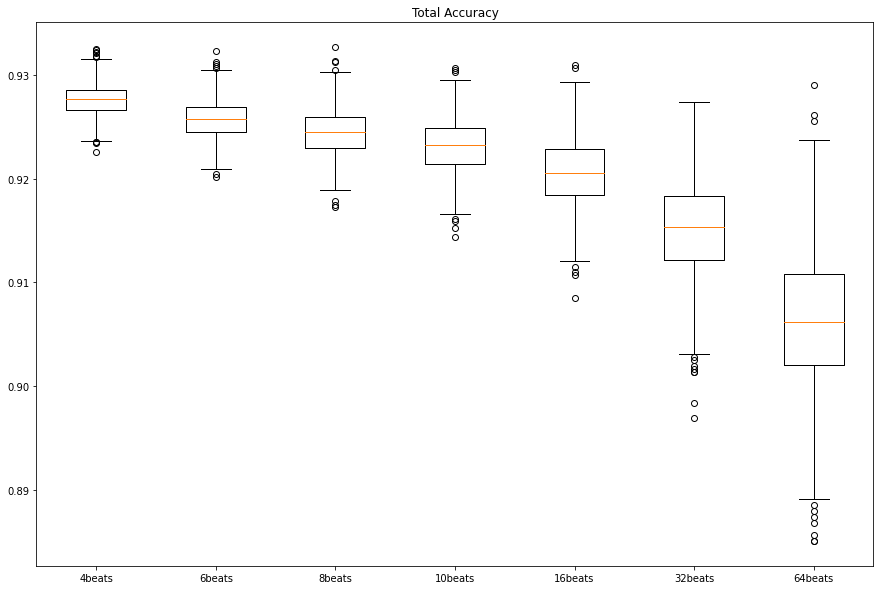

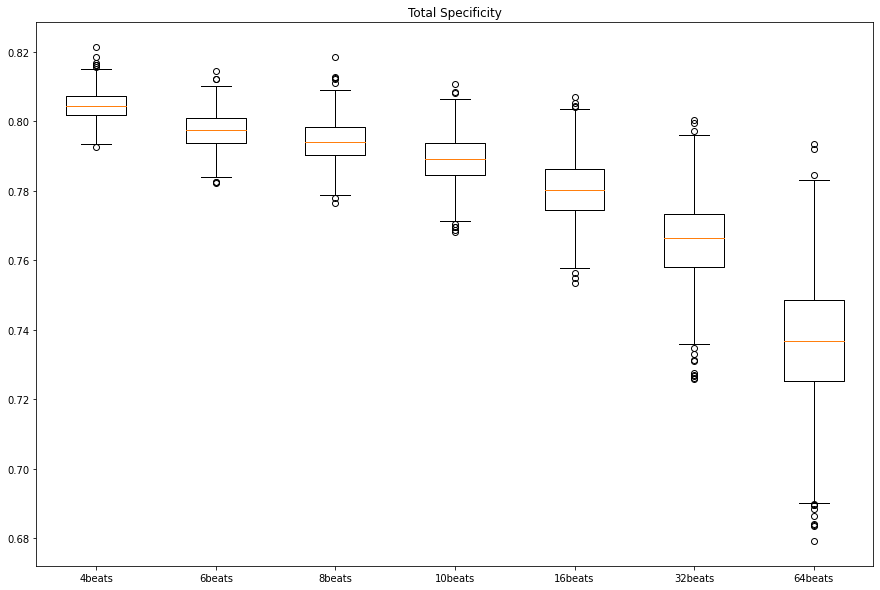

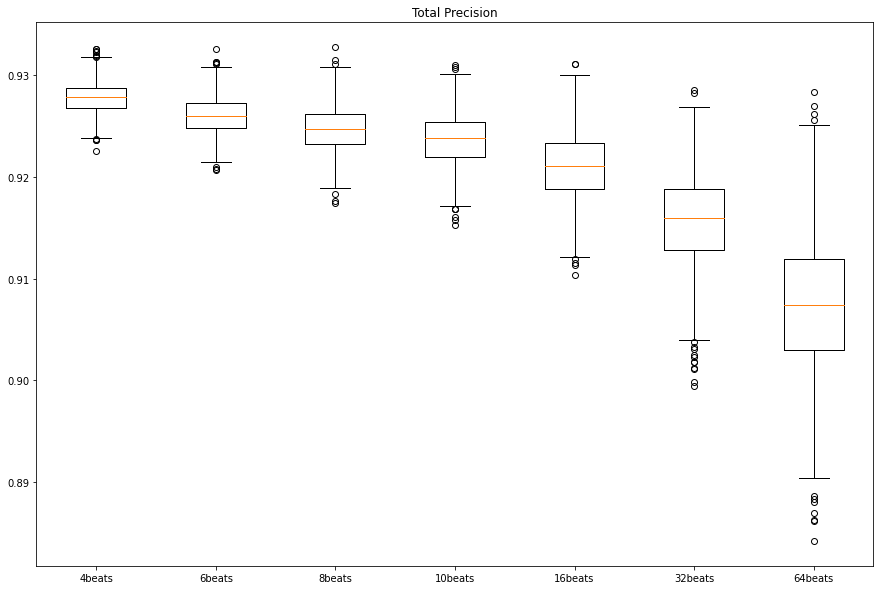

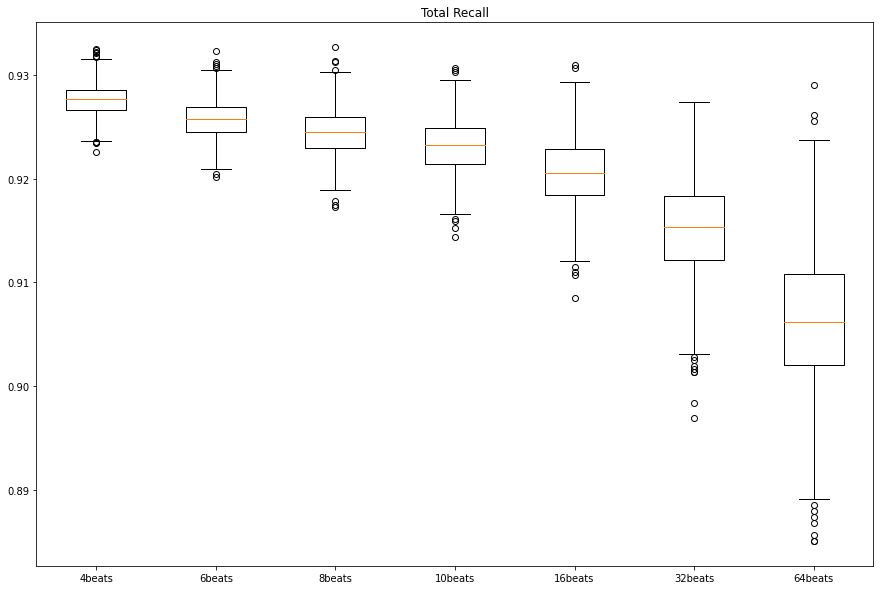

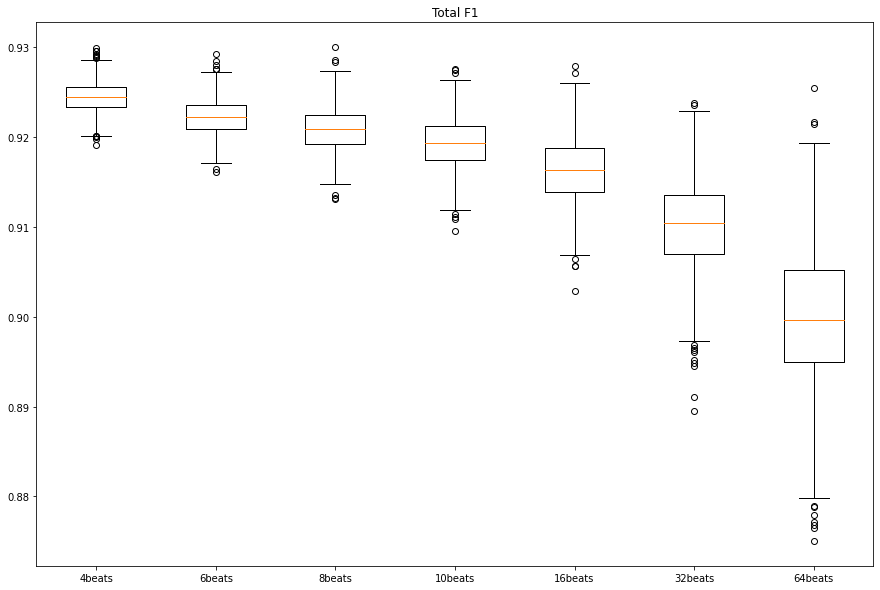

In [6]:
plt.boxplot(x=df_accuracy, labels=df_accuracy.columns)
plt.title("Total Accuracy")
plt.show()

plt.boxplot(x=df_specificity, labels=df_specificity.columns)
plt.title("Total Specificity")
plt.show()

plt.boxplot(x=df_precision, labels=df_precision.columns)
plt.title("Total Precision")
plt.show()

plt.boxplot(x=df_recall, labels=df_recall.columns)
plt.title("Total Recall")
plt.show()

plt.boxplot(x=df_f1, labels=df_f1.columns)
plt.title("Total F1")
plt.show()

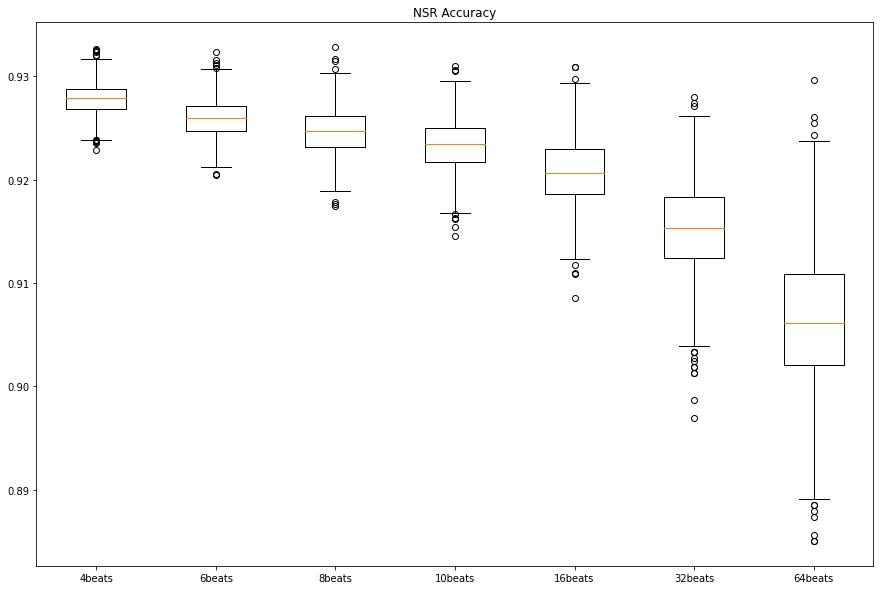

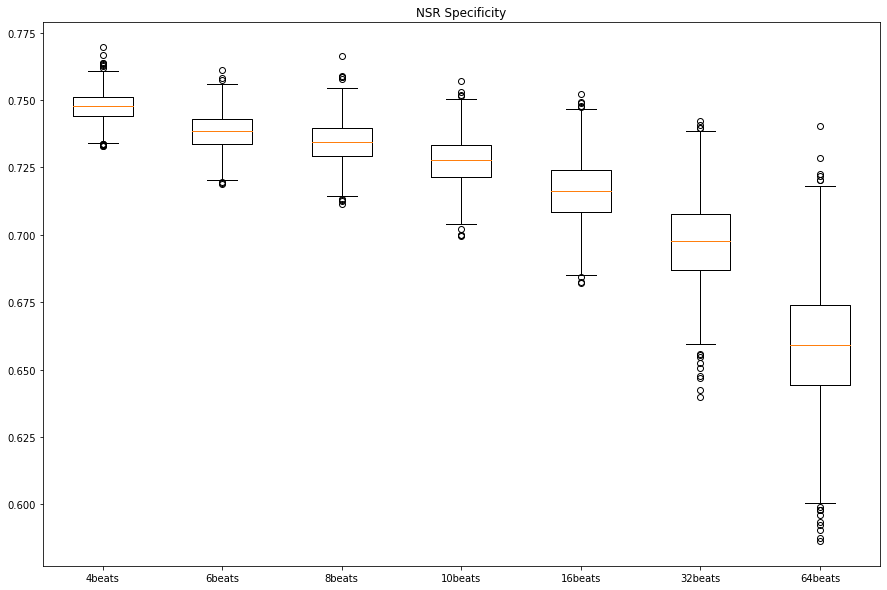

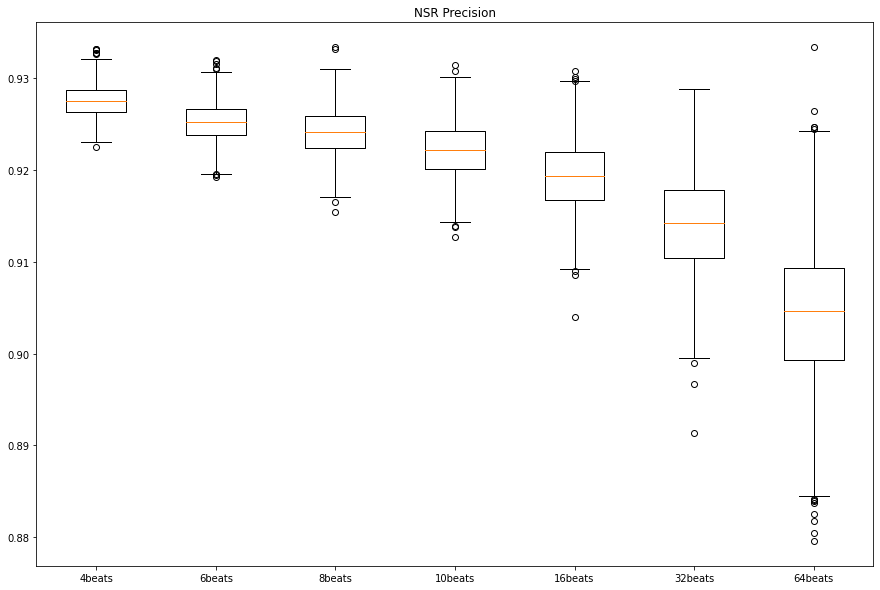

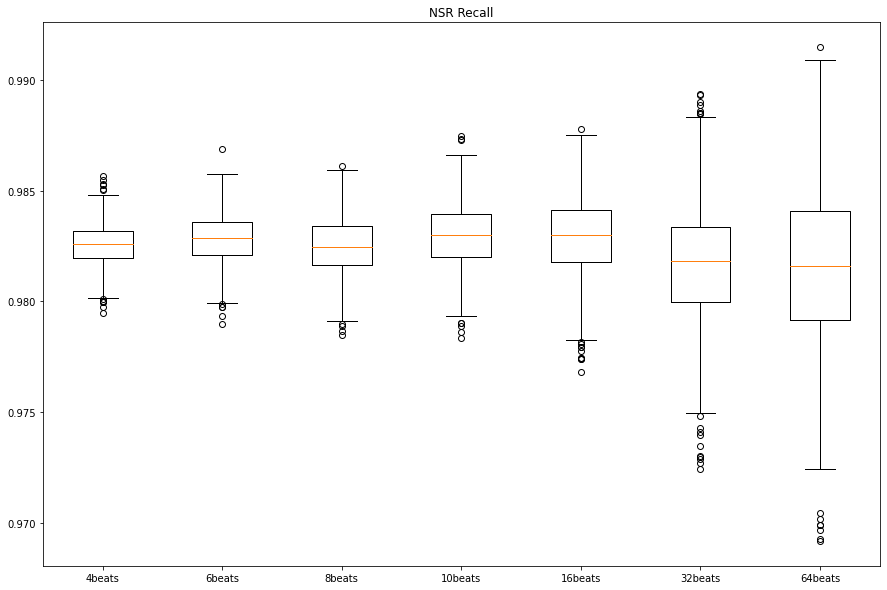

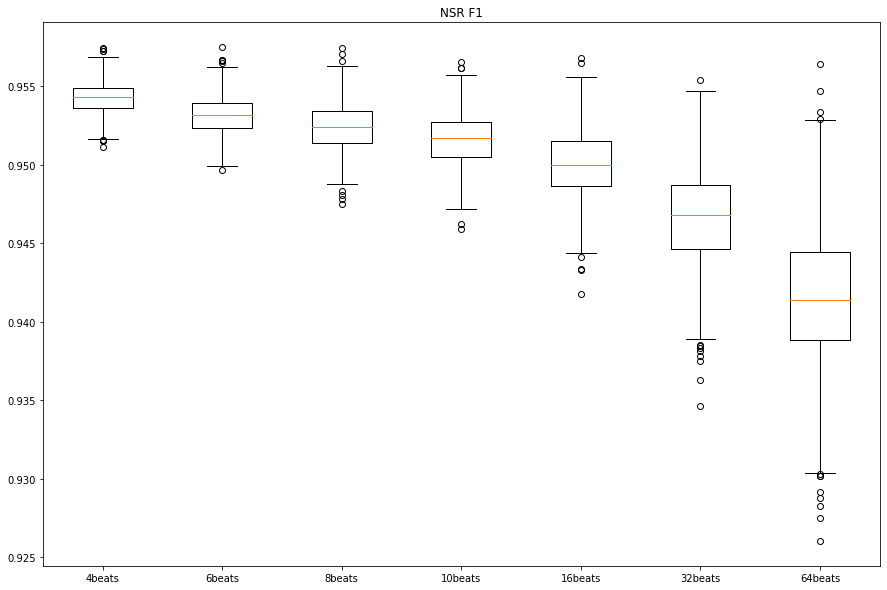

In [7]:
plt.boxplot(x=df_nsr_accuracy, labels=df_nsr_accuracy.columns)
plt.title("NSR Accuracy")
plt.show()

plt.boxplot(x=df_nsr_specificity, labels=df_nsr_specificity.columns)
plt.title("NSR Specificity")
plt.show()

plt.boxplot(x=df_nsr_precision, labels=df_nsr_precision.columns)
plt.title("NSR Precision")
plt.show()

plt.boxplot(x=df_nsr_recall, labels=df_nsr_recall.columns)
plt.title("NSR Recall")
plt.show()

plt.boxplot(x=df_nsr_f1, labels=df_nsr_f1.columns)
plt.title("NSR F1")
plt.show()

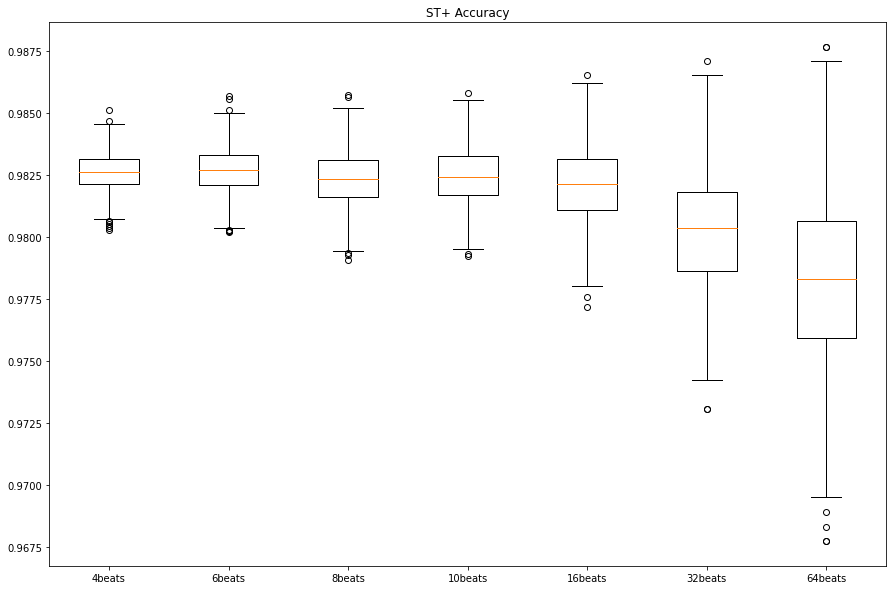

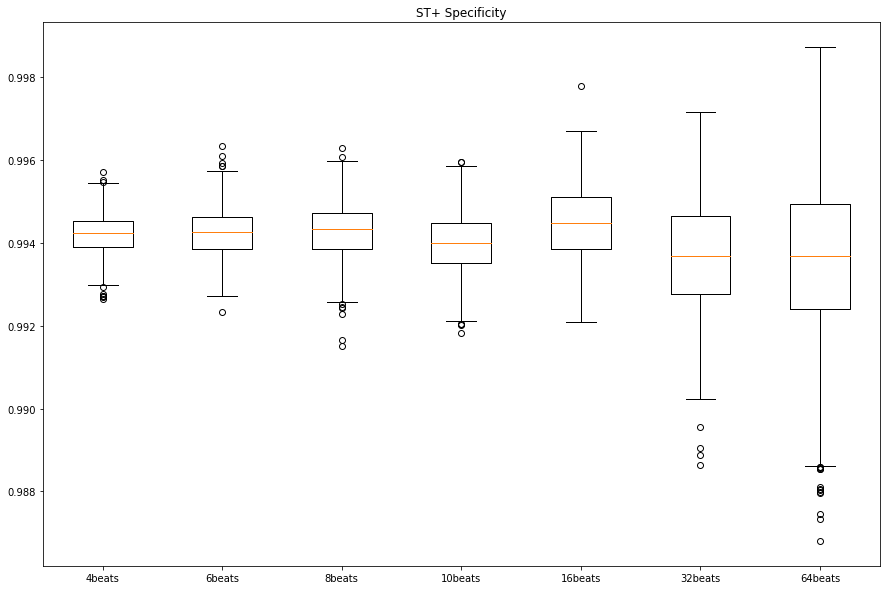

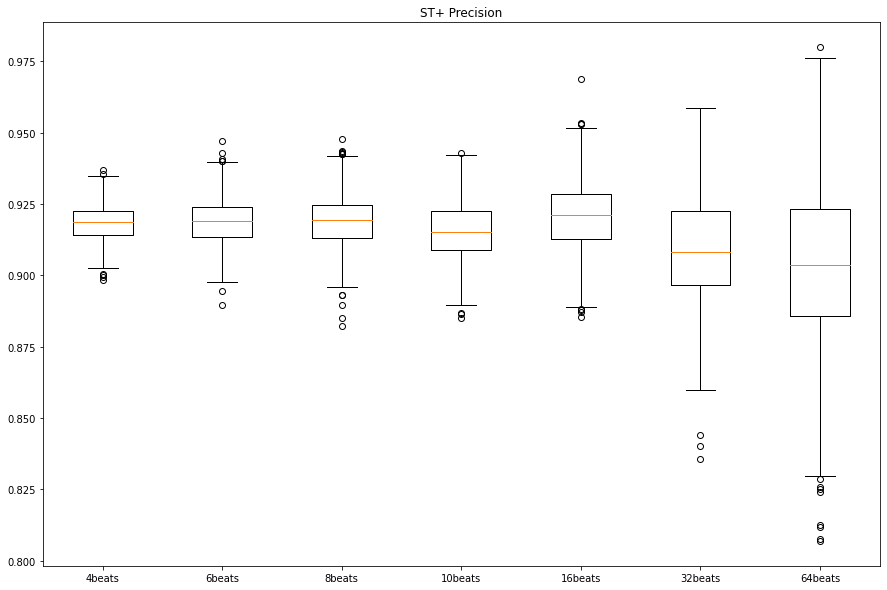

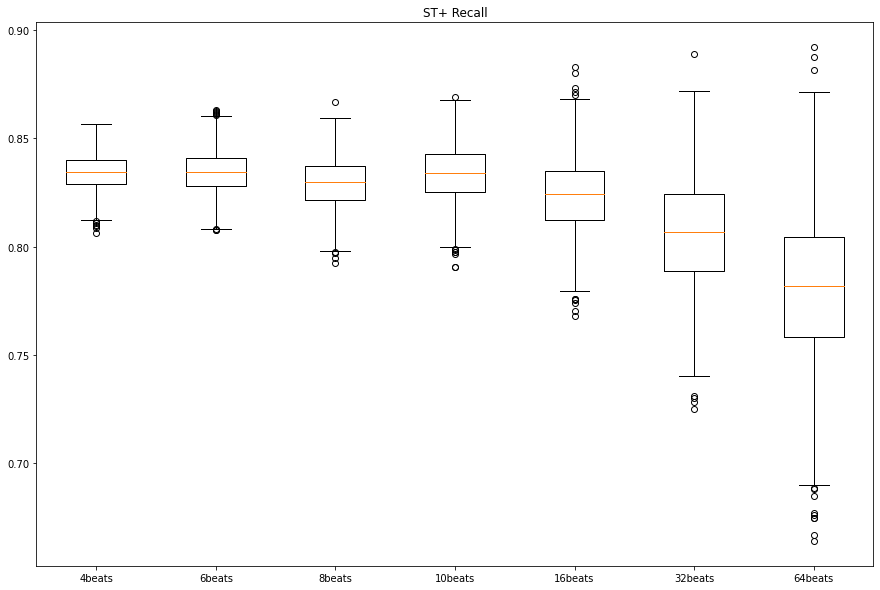

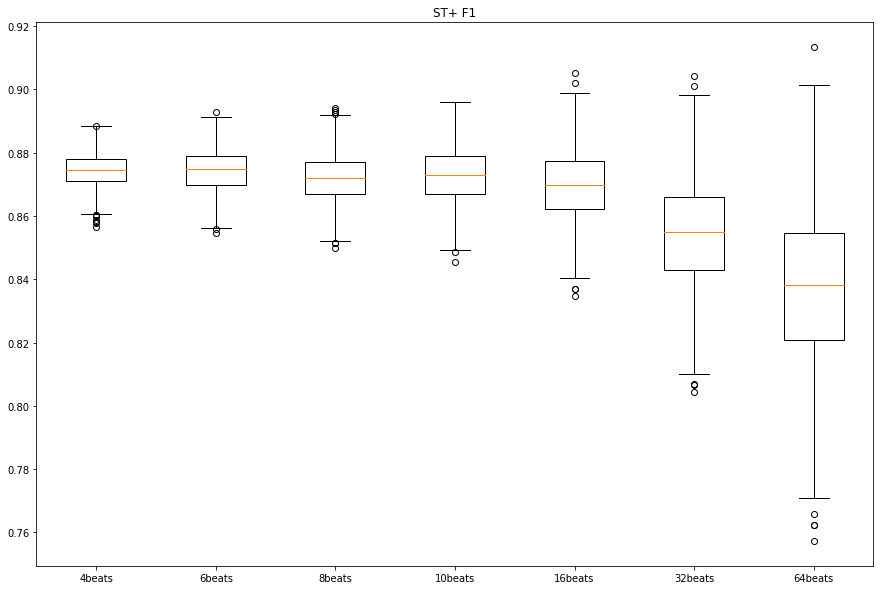

In [8]:
plt.boxplot(x=df_st1_accuracy, labels=df_st1_accuracy.columns)
plt.title("ST+ Accuracy")
plt.show()

plt.boxplot(x=df_st1_specificity, labels=df_st1_specificity.columns)
plt.title("ST+ Specificity")
plt.show()

plt.boxplot(x=df_st1_precision, labels=df_st1_precision.columns)
plt.title("ST+ Precision")
plt.show()

plt.boxplot(x=df_st1_recall, labels=df_st1_recall.columns)
plt.title("ST+ Recall")
plt.show()

plt.boxplot(x=df_st1_f1, labels=df_st1_f1.columns)
plt.title("ST+ F1")
plt.show()

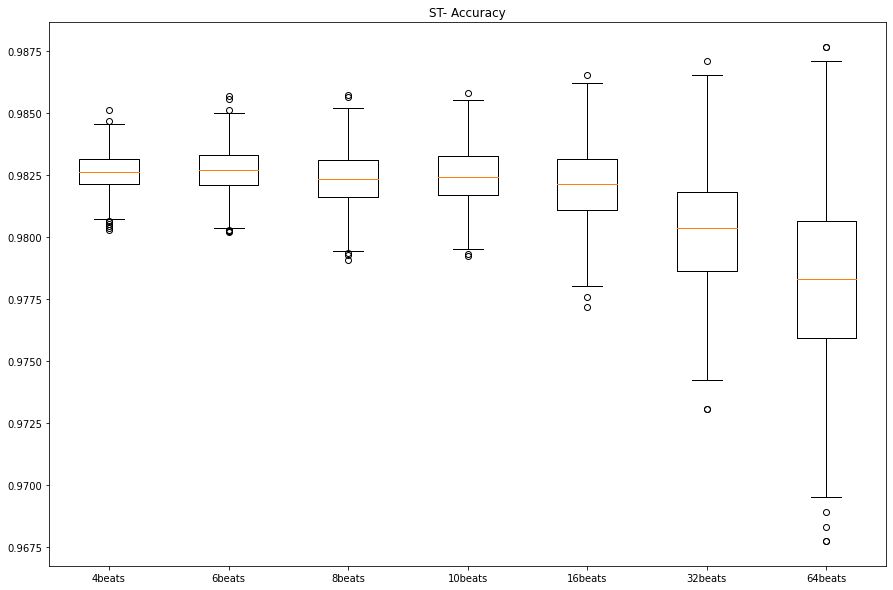

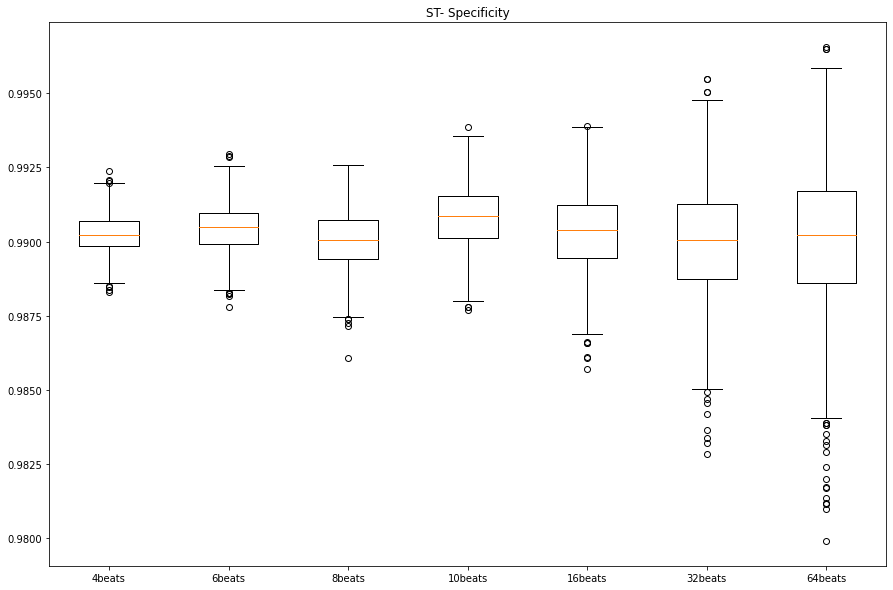

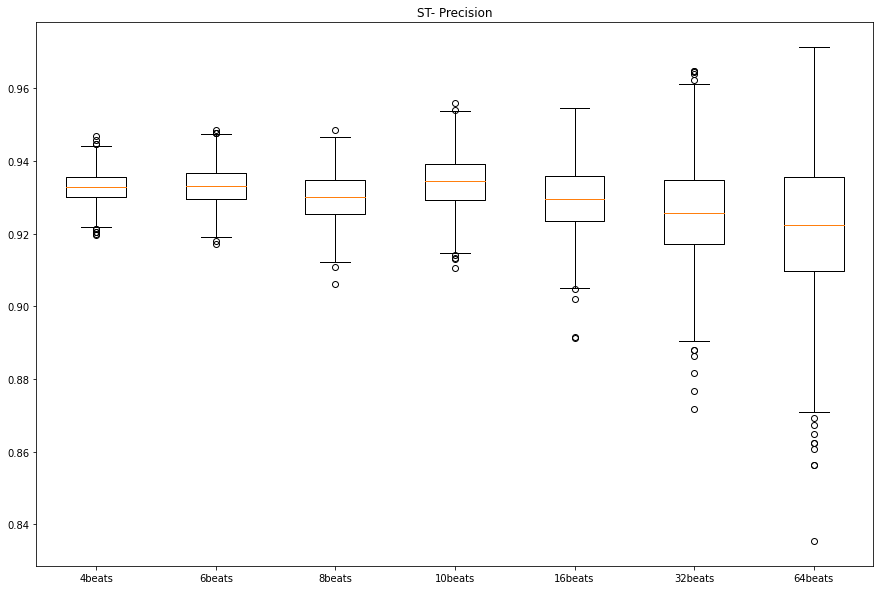

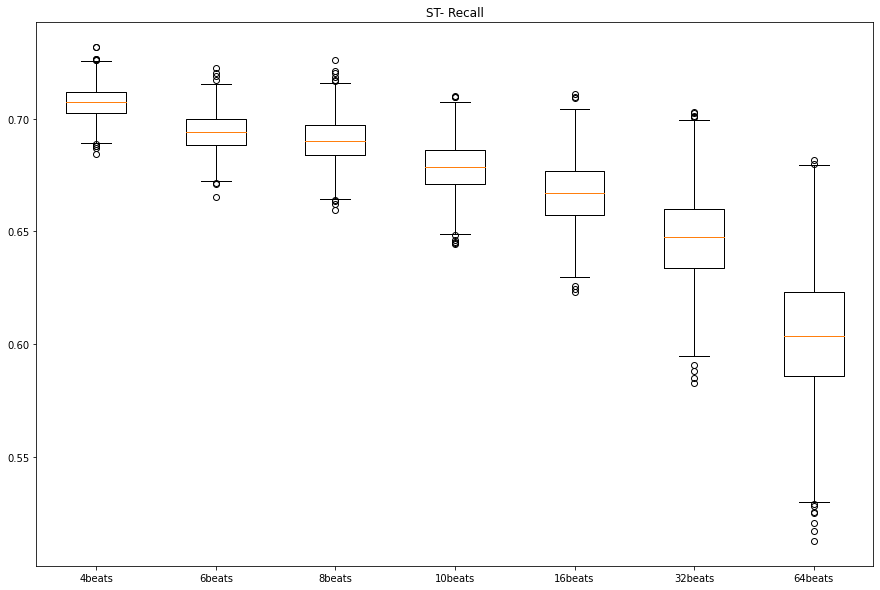

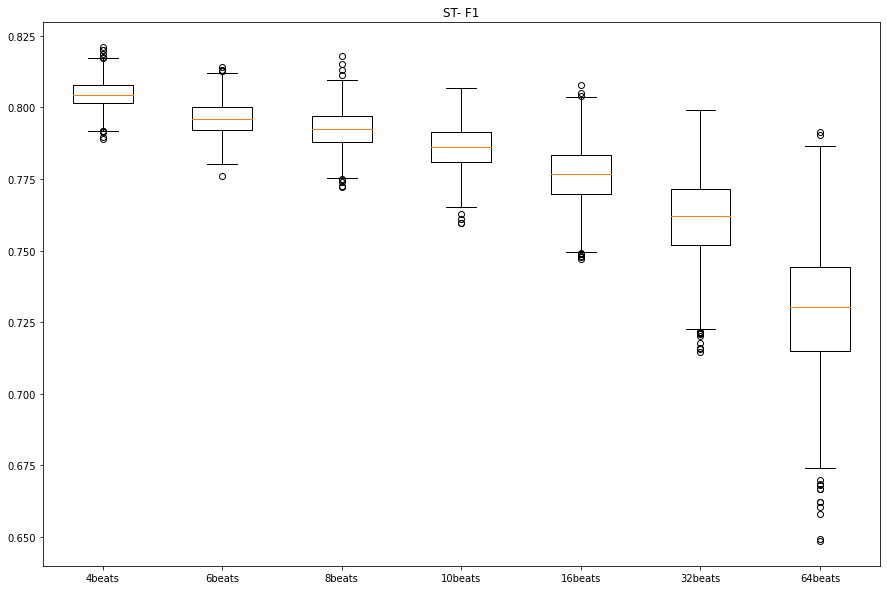

In [9]:
plt.boxplot(x=df_st0_accuracy, labels=df_st0_accuracy.columns)
plt.title("ST- Accuracy")
plt.show()

plt.boxplot(x=df_st0_specificity, labels=df_st0_specificity.columns)
plt.title("ST- Specificity")
plt.show()

plt.boxplot(x=df_st0_precision, labels=df_st0_precision.columns)
plt.title("ST- Precision")
plt.show()

plt.boxplot(x=df_st0_recall, labels=df_st0_recall.columns)
plt.title("ST- Recall")
plt.show()

plt.boxplot(x=df_st0_f1, labels=df_st0_f1.columns)
plt.title("ST- F1")
plt.show()

## Summary table

In [10]:
metrics.to_csv("result_aggregate/aggregate_result_multi_1000x_random_split.csv")
metrics.head(10)

,aaa_name,acc_avg,acc_sd,specificity_avg,specificity_sd,precision_avg,precision_sd,recall_avg,recall_sd,f1_avg,...,st-_accuracy_avg,st-_accuracy_sd,st-_specificity_avg,st-_specificity_sd,st-_precision_avg,st-_precision_sd,st-_recall_avg,st-_recall_sd,st-_f1_avg,st-_f1_sd
0,4beats,0.927581,0.001530,0.804414,0.004179,0.927737,0.001520,0.927581,0.001530,0.924402,...,0.982655,0.000738,0.990250,0.000637,0.932886,0.004297,0.707223,0.006920,0.804508,0.004849
1,6beats,0.925715,0.001841,0.797431,0.004997,0.926005,0.001843,0.925715,0.001841,0.922217,...,0.982715,0.000909,0.990445,0.000796,0.933006,0.005348,0.694233,0.008347,0.796068,0.005910
2,8beats,0.924471,0.002198,0.794266,0.005988,0.924696,0.002180,0.924471,0.002198,0.920871,...,0.982372,0.001054,0.990047,0.000957,0.929973,0.006498,0.690377,0.009633,0.792413,0.006756
3,10beats,0.923186,0.002532,0.789138,0.006745,0.923700,0.002496,0.923186,0.002532,0.919278,...,0.982465,0.001141,0.990837,0.001036,0.934311,0.007111,0.678599,0.010970,0.786124,0.007772
4,16beats,0.920588,0.003273,0.780363,0.008619,0.921103,0.003249,0.920588,0.003273,0.916322,...,0.982125,0.001527,0.990334,0.001345,0.929641,0.009485,0.666716,0.014276,0.776428,0.010538
5,32beats,0.915054,0.004533,0.765660,0.011893,0.915651,0.004505,0.915054,0.004533,0.910160,...,0.980228,0.002225,0.989996,0.001888,0.925659,0.013482,0.647137,0.020016,0.761527,0.014774
6,64beats,0.906137,0.006835,0.736559,0.017956,0.907261,0.006771,0.906137,0.006835,0.899657,...,0.978346,0.003348,0.990110,0.002634,0.921746,0.020099,0.603664,0.028916,0.729085,0.022577


## Summary table mean only

In [11]:
metrics_mean_only = metrics[[
    "aaa_name",
    "acc_avg", "specificity_avg", "precision_avg", "recall_avg", "f1_avg",
    "nsr_accuracy_avg", "nsr_specificity_avg", "nsr_precision_avg", "nsr_recall_avg", "nsr_f1_avg",
    "st+_accuracy_avg", "st+_specificity_avg", "st+_precision_avg", "st+_recall_avg", "st+_f1_avg",
    "st-_accuracy_avg", "st-_specificity_avg", "st-_precision_avg", "st-_recall_avg", "st-_f1_avg",
]]
metrics_mean_only.to_csv("result_aggregate/aggregate_mean_only_result_multi_1000x_random_split.csv", sep=";")
metrics_mean_only.head(10)

,aaa_name,acc_avg,specificity_avg,precision_avg,recall_avg,f1_avg,nsr_accuracy_avg,nsr_specificity_avg,nsr_precision_avg,nsr_recall_avg,...,st+_accuracy_avg,st+_specificity_avg,st+_precision_avg,st+_recall_avg,st+_f1_avg,st-_accuracy_avg,st-_specificity_avg,st-_precision_avg,st-_recall_avg,st-_f1_avg
0,4beats,0.927581,0.804414,0.927737,0.927581,0.924402,0.927775,0.747536,0.927538,0.982578,...,0.982655,0.994209,0.918300,0.834490,0.874360,0.982655,0.990250,0.932886,0.707223,0.804508
1,6beats,0.925715,0.797431,0.926005,0.925715,0.922217,0.925912,0.738443,0.925212,0.982857,...,0.982715,0.994257,0.918684,0.834300,0.874414,0.982715,0.990445,0.933006,0.694233,0.796068
2,8beats,0.924471,0.794266,0.924696,0.924471,0.920871,0.924677,0.734395,0.924115,0.982477,...,0.982372,0.994294,0.918911,0.829409,0.871805,0.982372,0.990047,0.929973,0.690377,0.792413
3,10beats,0.923186,0.789138,0.923700,0.923186,0.919278,0.923369,0.727469,0.922209,0.982974,...,0.982465,0.994017,0.915609,0.834008,0.872825,0.982465,0.990837,0.934311,0.678599,0.786124
4,16beats,0.920588,0.780363,0.921103,0.920588,0.916322,0.920743,0.716150,0.919312,0.982932,...,0.982125,0.994466,0.920707,0.823920,0.869499,0.982125,0.990334,0.929641,0.666716,0.776428
5,32beats,0.915054,0.765660,0.915651,0.915054,0.910160,0.915227,0.697004,0.914104,0.981673,...,0.980228,0.993714,0.908767,0.806492,0.854287,0.980228,0.989996,0.925659,0.647137,0.761527
6,64beats,0.906137,0.736559,0.907261,0.906137,0.899657,0.906328,0.659044,0.904387,0.981614,...,0.978346,0.993542,0.903391,0.781832,0.837583,0.978346,0.990110,0.921746,0.603664,0.729085
